# Week 5
## Overview

This week we'll talk about advanced network measures (beyond the degree distribution). We will use these tools to make sense of the network of the Rock Musicians on Wikipedia. 
This is the outline for today:

* Visualization and qualitative analysis of the Rock Music Artists Network
* Properties of the network structure
* Finally some more visualizations

> _Reading_: This week, the reading is mostly for reference. It's for you to have a place to go, if you want more detailed information about the topics that I cover in the video lectures. Thus, I recommend you check out **Chapter 9** of the network science book. In particular, we'll delve into Section 9.4 in the exercises below. We will also talk a little bit about degree correlations - you can read about those in **Chapter 7**.

In [1]:
import networkx as nx
import requests
import matplotlib.pyplot as plt
import forceatlas2
import backboning_p3nx2.backboning as bb

In [ ]:
url = "https://raw.githubusercontent.com/Jacopo00811/socialgraphs2025/refs/heads/main/graphs/rock_performers_network.graphml"

try:
    response = requests.get(url)
    response.raise_for_status()
    G = nx.parse_graphml(response.text)

    print("Successfully loaded the graph from GitHub.")
    print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
except requests.exceptions.RequestException as e:
    print(f"Failed to download the graph file: {e}")

G_undirected = G.to_undirected()

Successfully loaded the graph from GitHub.
Graph has 487 nodes and 7370 edges.


# Part A: Let's  visualise some more!

For the rest of the course, we will primarily use [`ForceAtlas2`](https://journals.plos.org/plosone/article%3Fid=10.1371/journal.pone.0098679), a layout algorithm which was developed by the creators of the [Gephy graph analysis software](https://gephi.org). IMHO it's the prettiest network layout algorithm & since last year it's been implemented in NetworkX, so it should be easy to use.

*Exercise 1:* Plot the Network using ForceAtlas2. For visualization, you should work with the network from last time, the Giant Connected Component ... and the undirected version.

> * Visualize the network using NetworkX
>   * Node color should depend on the `length_of_content` attribute (see notes from last week).
>   * Node size should depend on the node *degree*
> * Play with the force atlas algorithm parameters to obtain a visualization you like. 

<div class="alert alert-block alert-info">
It's OK to use your LLM as much as needed for this exercise. The only goal is to create a nice visualization.
</div>

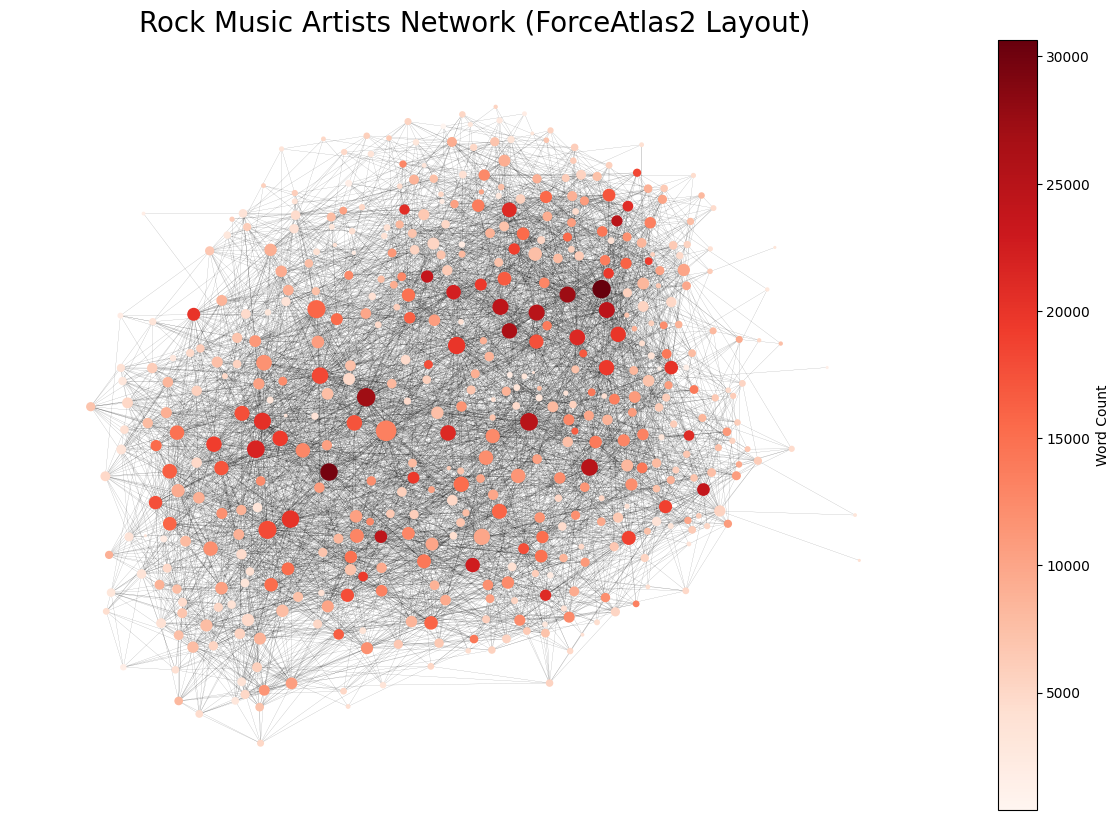

In [3]:
# node size depends on degree
degrees = [val for (_, val) in G_undirected.degree()]
node_sizes = [d * 1.5 for d in degrees]

# node color depends on word count
nodes = list(G_undirected.nodes())
word_counts = [G_undirected.nodes[node]['word_count'] for node in nodes]

# calculate layout using ForceAtlas2
# the forceatlas2_networkx_layout function is outdated
# manually convert the graph to a numpy array and call the core function.
pos_array = forceatlas2.forceatlas2(nx.to_numpy_array(G_undirected), gravity=0.05)
# convert the position array back to a dictionary format that networkx expects
pos = {node: pos_array[i] for i, node in enumerate(G_undirected.nodes())}

plt.figure(figsize=(15, 10))
nodes = nx.draw_networkx_nodes(
    G_undirected,
    pos,
    node_size=node_sizes,
    node_color=word_counts,
    cmap=plt.cm.Reds,
)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.6, width=0.1)
plt.title("Rock Music Artists Network (ForceAtlas2 Layout)", fontsize=20)
cbar = plt.colorbar(nodes)
cbar.set_label("Word Count")
plt.axis('off')
plt.show()

*Exercise 2*: We continue with a qualitative inspection of the Wikipedia pages. Inspecting the data manually will develop intuitions that will help us to intepret our quantitative results. We investigate the reasons for links between characters to exist on Wikipedia.

> 1. Consider the nodes with highest in-degree in the network. Open the corresponding Wikipedia page.
>    * Consider the set of neighbours pointing towards the node found above.
>       * Done in the code.
>    * What is the relation between the band/mucisians you identified and their network neighbours? (e.g. did they sing a song together, did one write a song for the other?, etc ...). You don't need to come up with a grand theory of Rock Music here, I just want you to think about how links arise, why the links are there.
>       * In-Degree
>           * Led Zeppelin are a fundational band in rock's history. The many Wikipedia links pointing to them could signify that many bands or artists consider them their major influence. They kind of act like an authority in the world of rock music.
>       * Out-Degree
>           * Alice in Chains has many out pointing Wikipedia links. This could have different reasons like: their own influence (listing bands that influenced Alice in Chains), the contemporaries and peers form the same area and same type of rock music, bands that were influenced by them in more recent years, and collaborations they have been involved. They also represent well connected hubs with a well detailed history.
>    * Repeat the exercise for the highest out-degree node.
>       * Done.
>    * Are there differences between reasons for out- and in-links? Again, there's no right answer here. I just want you to think about some of the reasons why links may occur in Wikipedia. Answer in your own words.
>       * Yes there are differences. Having many in links indicate that the artist is an authority or has had a big impact in the rock genre community. Instead many out links indicated that an artist is a well documented hub with a lot of references to the career or to newer bands that they influenced. It is mora a description of how well an artist is contextualized and documented in Wikipedia rather than if the artist is considered an authority in the community. 
> 4. Create a scatter plot, where each node is a point, and the axes show in- versus out-degree. That way you can visually inspect the patterns of how in- and out-degree are connected across all the nodes in the network. Comment on what you see.
>   * There is a positive correlation (better if log-log axes are used) between the in and out degree. This indicates that authorities or influencial artists in the network also have well documented pages with many outgoing links.
> 3. Are there any nodes with high(ish) out-degree and with few incoming connections? If yes, open WikiPages of those bands/mucisians and explain what happens?
>   * Yes, for example Bryan Adams. His page is well documented but his music was probabily not a big influence for other artist in the community or he did not do many featuring with other artist.
> 4. Are there any nodes with high in-degree and few going connections? Again, open the WikiPages corresponding to those nodes and explain what happens?
> * Yes, again the Led Zeppelin for example. They are an authority in the community and they are considered a foundational band. The low out degree indicates that the page mostly describes their story rather than saying who they got their style from or with whom they collaborated or influenced.
<div class="alert alert-block alert-info">
For this one, I hope you'll limit your LLM use. It's OK to get help in creating the scatter plot, but use NetworkX on your own to identify nodes, and do your own reading and interpreting of Wiki pages.
</div>

Top artist by in-degree: [('Led Zeppelin', 119)]
Neighbors pointing to them: ['311 (band)', 'ABBA', 'Bryan Adams', 'Aerosmith', 'Alice in Chains', 'The Allman Brothers Band', 'Alter Bridge', 'Arctic Monkeys', 'Audioslave', 'Avenged Sevenfold', 'Bachman–Turner Overdrive', 'Bad Company', 'The Band', 'The Black Crowes', 'Black Sabbath', 'Blur (band)', 'Bon Jovi', 'Jeff Buckley', 'Bullet for My Valentine', 'Bush (British band)', 'Cheap Trick', 'Eddie Cochran', 'Coheed and Cambria', 'Phil Collins', 'Alice Cooper', 'Chris Cornell', 'Cream (band)', 'Creed (band)', 'The Cult', 'Deep Purple', 'Def Leppard', 'Fats Domino', 'Donovan', 'Drowning Pool', 'Duran Duran', 'Electric Light Orchestra', 'England Dan & John Ford Coley', 'Europe (band)', 'The Everly Brothers', 'Faith No More', 'FireHouse', 'Foo Fighters', 'Foreigner (band)', 'Godsmack', 'Golden Earring', 'Greta Van Fleet', "Guns N' Roses", 'Heart (band)', 'Hinder', 'Hootie & the Blowfish', 'INXS', 'Iron Maiden', "Jane's Addiction", 'Jethro T

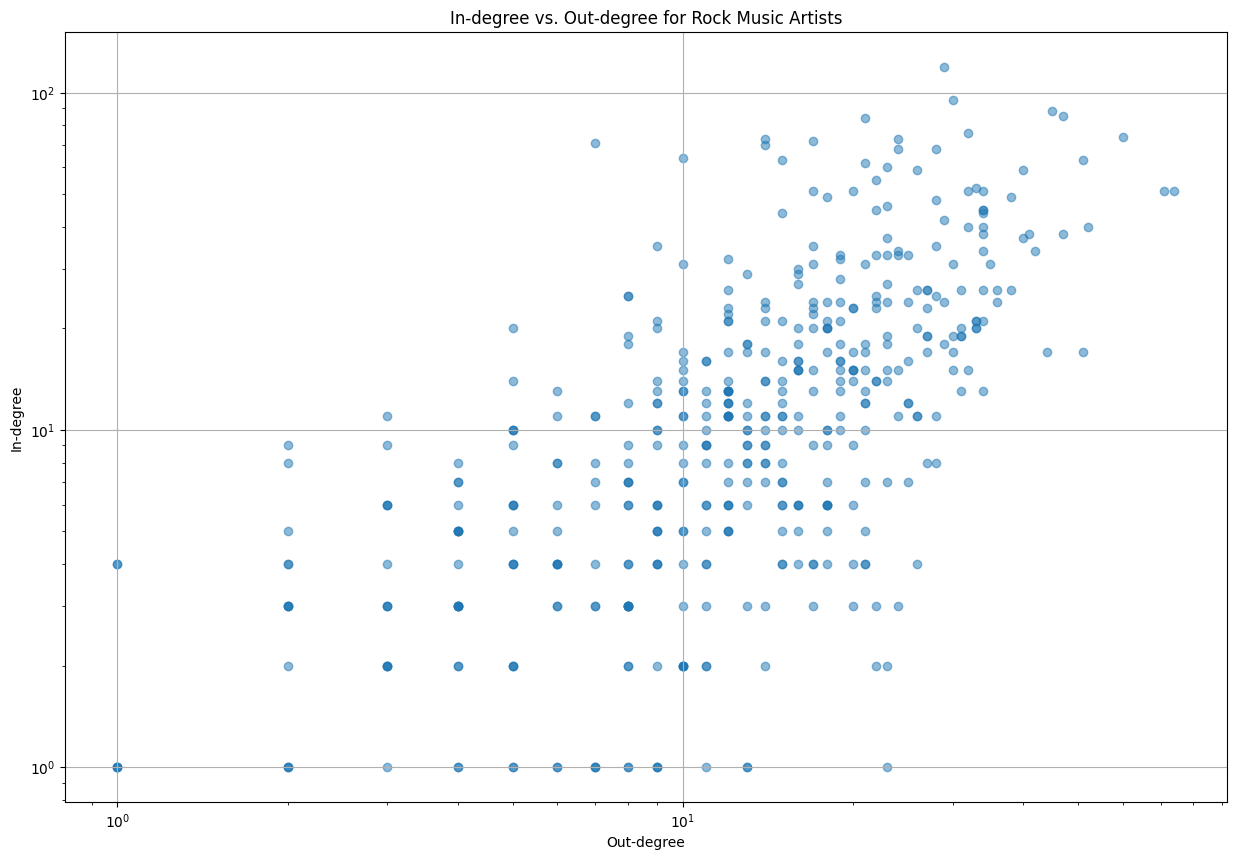


High out-degree and low in-degree nodes: [('Bryan Adams', 34)]

High in-degree and low out-degree nodes: [('Led Zeppelin', 90)]


In [4]:
# identify top artists by in-degree and out-degree
top_in_degree = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:1]
print("Top artist by in-degree:", top_in_degree)
print("Neighbors pointing to them:", list(G.predecessors(top_in_degree[0][0])))
top_out_degree = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:1]
print("\nTop artist by out-degree:", top_out_degree)
print("Neighbors they point to:", list(G.successors(top_out_degree[0][0])))

# plot
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

plt.figure(figsize=(15, 10))
plt.scatter(out_degrees, in_degrees, alpha=0.5)
plt.title('In-degree vs. Out-degree for Rock Music Artists')
plt.xlabel('Out-degree')
plt.ylabel('In-degree')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

# find high out and low in degree nodes
deltas = {}
for node in G.nodes():
    in_deg = G.in_degree(node)
    out_deg = G.out_degree(node)
    delta = out_deg - in_deg
    deltas[node] = delta
sorted_deltas = sorted(deltas.items(), key=lambda x: x[1], reverse=True)
high_out_low_in = sorted_deltas[:1]
print("\nHigh out-degree and low in-degree nodes:", high_out_low_in)

# find high in and low out degree nodes
deltas = {}
for node in G.nodes():
    in_deg = G.in_degree(node)
    out_deg = G.out_degree(node)
    delta = in_deg - out_deg
    deltas[node] = delta
sorted_deltas = sorted(deltas.items(), key=lambda x: x[1], reverse=True)
high_in_low_out = sorted_deltas[:1]
print("\nHigh in-degree and low out-degree nodes:", high_in_low_out)

# Part B:  Advanced tools 

> **Video lecture**: *Network measures*. There's an updated video below, and if you can't get enough, you can watch the original version from 2015 [here](https://www.youtube.com/watch?v=0uAYpOqVHCU).

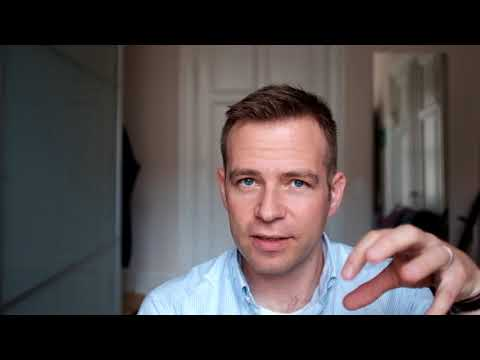

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("IOWXZFOyk9Y", width=800, height=450)

*Exercise 3:* Last time we visually analyzed (plotted) the degree distributions of our network. Now, let's analyze it using some of the tools from previous lectures. For this exercise we are going to look at the *directed* graph (rememeber, we asked you to keep one?).

> 1. What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?
>   * The results for the in degree show how the nodes in the network tend to have lower median and mode, meaning that there are more nodes with a smaller in degree respect to the out degree. The average is equal for the in and out degrees but the out degree spans a wider range, from 0 to 119 while the in degree only has a maximum value of 74.
> 2. Let's also look at the *[exponent of the degree distribution](http://networksciencebook.com/chapter/4#degree-exponent)* 
>    * To calculate it, you can install [`powerlaw`](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777) package (I could not install in conda, so I used `pip install powerlaw`)
>    * Use `powerlaw.Fit(degree).alpha` for fitting
>    * Find the degree exponent for in-, out- and total- degree distribution. Think about what you learned in the book - what does each exponent say about our network?
>       * Total-degree exponent $ \gamma = 3.2146416254090786 $:
>           * Considering the total degree exponent $ \gamma $ the network falls in the random regime. In this regime we can observe the small world phenomenon. There is a tenency, for networks in this regime, to have smaller and less numerous hubs.
>       * In-degree exponent $ \gamma = 2.711922540920007 $:
>           * Considering the in degree exponent $ \gamma $ the network fall in the scale free regime. These are ultra-small networks with many nodes with a few connections and a few nodes with a lot of connections.
>       * Out-degree exponent $ \gamma = 5.742508480765749 $:
>           * Considering the out degree exponent $ \gamma $ the network falls in the random regime. The tendency described for the total degree exponent $ \gamma $ above should be even more clear in this case with smaller and less numerous hub and more average nodes.
>    * When analyzing the plots of in- and out- degree distribution last week, did you come up to the same conclusions?
>       * The conclusion was similar for the degree distributions. It was clear form the plots how the in degree was more shifted to lower values, as highlighted by the exponent value $ \gamma $, that classifies the network in the scale free regime, where the "rich gets richer" phenomenon can be observed with a lot of nodes with small degree and a few big hubs. 
>    * Reflect on the whole power-law thing. Are the degree distributions even power laws? Could a log-normal or exponential distribution be better? How would you find out what the right function to describe the various degree distributions are? 
>       * Fitting a power-law exponet is done mostly to give an idea of the distribution. This doesn't mean the actual distribution is a power-law. In fact real world networks often have distributions that are similar to power-laws. The real distribution might indeed be described by a power law with a early cut-off, a log normal distribution, or even an exponential in some cases. To find which one best fit the real network we could use statics to find if there's a statistiaclly significat difference between the distributionsor do visual inspection of the distribution's graphs. For exaple in a log-log scale plot the power law will be a straight line and deviations from it could be better analyzed.   
>    * A long time ago, a group of scientists analyzed the network spanned by **all** of Wikipedia (the paper is called [Wikipedias: Collaborative web-based encyclopedias as complex networks](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.74.016115); to access this paper, use findit.dtu.dk or read the preprint on [arXiv](https://arxiv.org/abs/physics/0602149)). Do your findings correspond to the results described in Chapter **III.A** of that paper? If not, try to give your explanation of why? 
>       * In the paper, the in degree distribution $ \gamma \approx 2.1 $ aligns with what has been found for the rock artist community. The value of $ \gamma $ falls in the scale free regime and that Wikipedia pages tend to follow a rich gets richer approach. For the out degree the values do not match. They find $ \gamma \approx 2.6 $, which should still put the network in the scale free regime, however it's not in out case where $ \gamma = 5.7 $. This could be due to the fact that our network represents a later, much more updated and detailed version of Wikipedia. In the paper it's also calculated an average exponent across eleven different language Wikipedias while we only consider the english language.
> 3. Plot a heatmap [(Hint here)](https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set) of the the in- versus out- degree for all characters. Zoom in on just the in-degree $[0,20]$ and out-degree $[0,20]$ area of the plot. What is the advantage of using a heatmap over the scatter plot from the previous Exercise (especially for understanding what's going on in this area)?
>   * It's more useful to use a heatmap in this situation becasue in the scatter plot there are many points clsoe to each other and they also might overlap. In this way every in and out degree in the range 0-20 is nicely represented adn it shows how many nodes have loa in and out degree. This is not easably noticeable in the scatter plot.
> 4. Why do you think I want you guys to use a directed graph? Are there questions we can ask using the directed graph that are not possible to answer in the undirected version? Which questions? Can you think of examples when the in/out distinction doesn't matter.
>   * Using a directed graph can help represent relationships that are intrinsically directional. For example, a band that took a lot of inspiration from Led Zeppelin will have a link pointing towards them, this cannot be represented with an undirected link, as we will loose this type of information. A question that requires a directed graph is finding the most influential artists. A question that doesn't need distinction beteen directed and undirected links could be identify clustering and communities.
> 5. We have one more metric that we have used, but not investigated so far. The node-attribute `length_of_content`. There are two things to look at.
>    * Firstly, we can verify that more text means more links. If that's true the length should correlate with out-degree. Does it? 
>       * Yes it's indeed true looking at the graph and the correlation coefficent that is 0.65.
>    * Secondly, and more interestingly, it could be that longer texts means *more famous* characters. And that means more in-links. 
>       * Also this hypotesis is verified by the plot of in degree vs word count and the value of the correlation that is 0.64.
>    * How should you test this? Well, here you are allowed to be **creative**. You may choose the method of your liking to study this question (e.g. look at it visually, test the correlation using [spearman](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) or [pearson](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html) correlations, fit a curve to the data, you decide). Are both questions true? If yes, which phenomenon is stronger? Explain your results in your own words. 
>       * Yes both phenomenons are true and statistically significant (with $ \alpha = 5%$),but the correlation between the out degree and the word count is slightly stronger. This suggests that longer Wikipedia pages are more strongly associated with having more outgoing links, probabily thanks to the more detailed documentation.


<div class="alert alert-block alert-info">
For this exercise, I also hope you'll limit your LLM use. Especially for the intrepretation parts. It's OK to get help for the heatmap in sub-part 3, maybe also for ideas of how to do the testing in part 5. But do your own interpretation :)
</div>

In [6]:
import numpy as np
import scipy.stats as stats
import powerlaw as pl

In [7]:
# find average, median, mode, minimum, and maximum value for in and out degree
print("\nIn-Degree Statistics:")
in_degrees = np.array([G.in_degree(n) for n in G.nodes()])
print("Average:", np.mean(in_degrees))
print("Median:", np.median(in_degrees))
print("Mode:", stats.mode(in_degrees)[0])
print("Minimum:", np.min(in_degrees))
print("Maximum:", np.max(in_degrees))

print("\nOut-Degree Statistics:")
out_degrees = np.array([G.out_degree(n) for n in G.nodes()])
print("Average:", np.mean(out_degrees))
print("Median:", np.median(out_degrees))
print("Mode:", stats.mode(out_degrees)[0])
print("Minimum:", np.min(out_degrees))
print("Maximum:", np.max(out_degrees))



In-Degree Statistics:
Average: 15.13347022587269
Median: 10.0
Mode: 3
Minimum: 0
Maximum: 119

Out-Degree Statistics:
Average: 15.13347022587269
Median: 13.0
Mode: 12
Minimum: 0
Maximum: 74


In [8]:
# fit power law to in and out degree distributions
fit = pl.Fit(list(dict(G.degree()).values()))
print('Total degree exponent:', fit.alpha)
fit_in = pl.Fit(in_degrees)
print('In-degree exponent:', fit_in.alpha)
fit_out = pl.Fit(out_degrees)
print('Out-degree exponent:', fit_out.alpha)

Calculating best minimal value for power law fit
Total degree exponent: 3.2146416254090786
Calculating best minimal value for power law fit
In-degree exponent: 2.711922540920007
Calculating best minimal value for power law fit
Out-degree exponent: 5.742508480765749


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


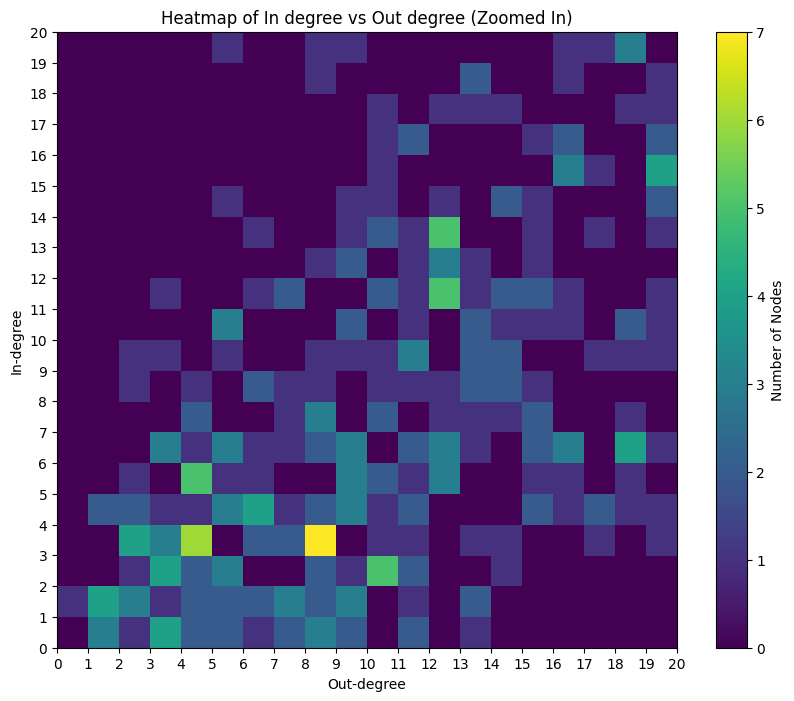

In [9]:
# plot heat map for in and out degree
bins = 20
degree_range = [[0, 20], [0, 20]]

heatmap, xedges, yedges = np.histogram2d(out_degrees, in_degrees, bins=bins, range=degree_range)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(figsize=(10, 8))
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=plt.cm.viridis, aspect='auto')
plt.title('Heatmap of In degree vs Out degree (Zoomed In)')
plt.xlabel('Out-degree')
plt.ylabel('In-degree')
plt.xticks(np.arange(0, 21, 1))
plt.yticks(np.arange(0, 21, 1))
cbar = plt.colorbar()
cbar.set_label('Number of Nodes')
plt.show()

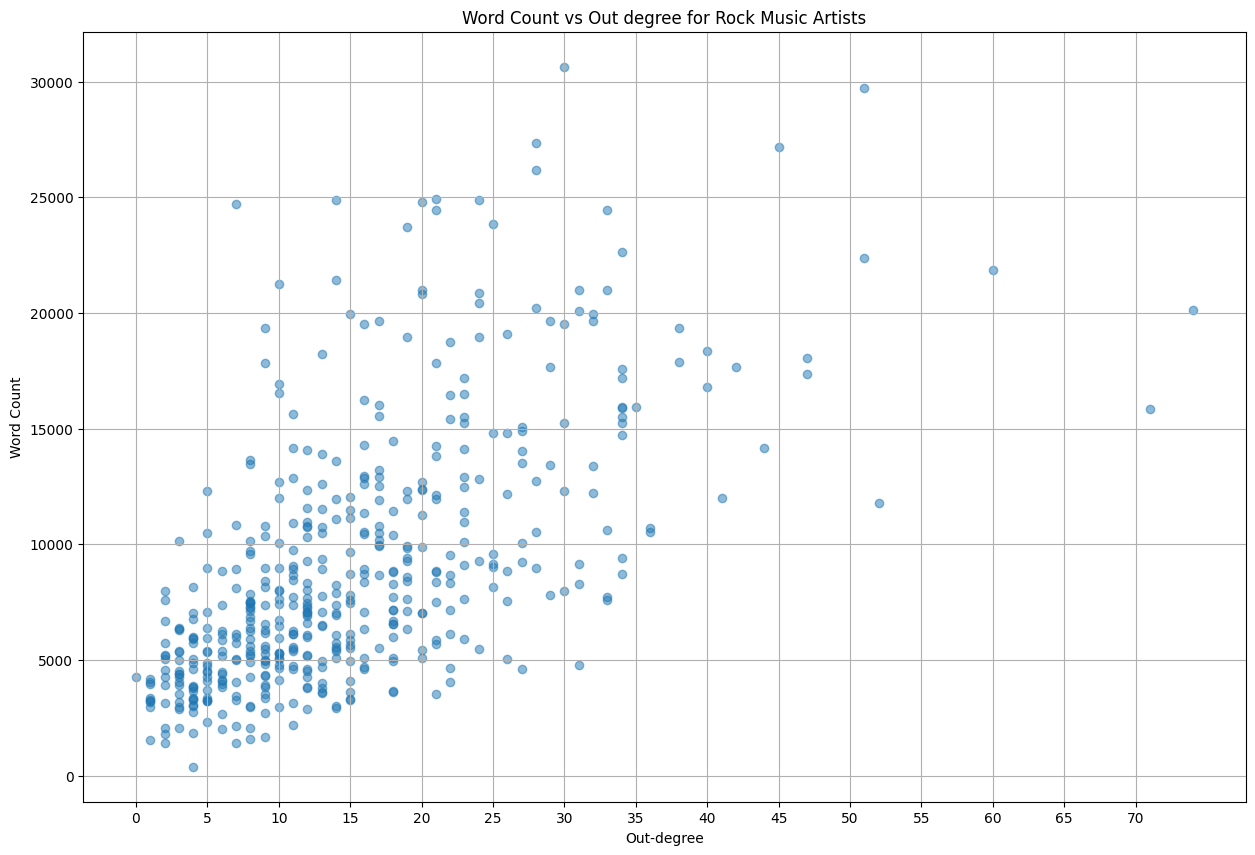

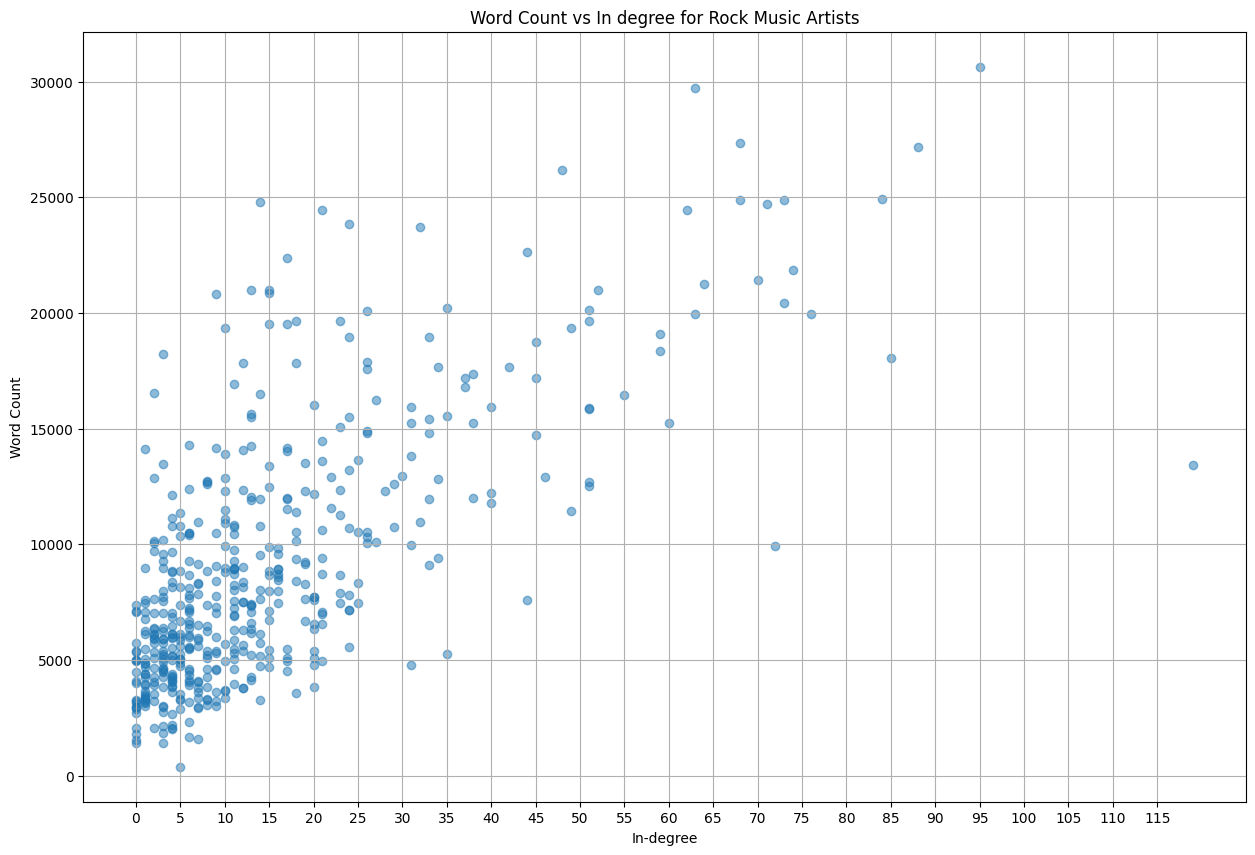

Spearman correlation between word count and out-degree:
Correlation coefficient: 0.655726403787365
P-value: 3.5061363845115154e-61
------------------------------
Spearman correlation between word count and in-degree:
Correlation coefficient: 0.6488684879708146
P-value: 1.5470642572710486e-59
------------------------------

The correlation between word count and out degree is statistically significant
The correlation between word count and in degree is statistically significant


In [10]:
# plot word count vs out degree
plt.figure(figsize=(15, 10))
plt.scatter(out_degrees, word_counts, alpha=0.5)
plt.title('Word Count vs Out degree for Rock Music Artists')
plt.xlabel('Out-degree')
plt.ylabel('Word Count')
plt.grid(True)
plt.xticks(np.arange(0, max(out_degrees)+1, 5))
plt.show()

# plot word count vs in degree
plt.figure(figsize=(15, 10))
plt.scatter(in_degrees, word_counts, alpha=0.5)
plt.title('Word Count vs In degree for Rock Music Artists')
plt.xlabel('In-degree')
plt.ylabel('Word Count')
plt.grid(True)
plt.xticks(np.arange(0, max(in_degrees)+1, 5))
plt.show()

# calculate Spearman correlation for word count vs out degree
corr_out, p_out = stats.spearmanr(word_counts, out_degrees)
print(f"Spearman correlation between word count and out-degree:")
print(f"Correlation coefficient: {corr_out}")
print(f"P-value: {p_out}")
print("-" * 30)

# calculate Spearman correlation for word count vs in degree
corr_in, p_in = stats.spearmanr(word_counts, in_degrees)
print(f"Spearman correlation between word count and in-degree:")
print(f"Correlation coefficient: {corr_in}")
print(f"P-value: {p_in}")
print("-" * 30)

# p-value: 5% significance level
alpha = 0.05
if p_out < alpha:
    print("\nThe correlation between word count and out degree is statistically significant")
else:
    print("\nThe correlation between word count and out degree is not statistically significant")

if p_in < alpha:
    print("The correlation between word count and in degree is statistically significant")
else:
    print("The correlation between word count and in degree is not statistically significant")


*Exercise 4:* Centralities, assortativity and more.

Earlier, we found the most connected nodes (using degree centrality). 

Now let's dig in and try to understand more about the network using more advanced features. 

**Note**: Not all of the measures we'll be considering below are defined for directed graphs. Only use the undirected graph when explicitly stated in the exercise. 
> 1. Find the 5 most central characters according to degree centrality. 
>       * The top 5 central characters are shown below in the code.
> 1. Find the 5 most central characters according to betweenness centrality. 
>    * Repeat Exercise 1 (plotting the network). However, this time use *betweenness centrality* to define the size of the node.
>    * What role do you imagine characters with high wikipedia graph betweenness centrality play in the network? 
>       * The character that are listed below (the top 5) are surley the most influencial "powerful" artists in the network. They are situated in the majority of shortest patha connecting other nodes indicating they role as hubs.
> 2. Find the 5 most central characters according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details). 
>    * Repeat Exercise 1 one final time (depending on which visualization method you liked the most). However, this time use eigenvector centrality to define the size of the node.
>    * What role do you imagine characters with high wikipedia graph eigenvector centrality play? Describe what is different about betweenness centrality and eigenvector centrality using your visualizations as examples.
>       * Artists with high eigenvector centrality are considered influential because they are connected to other influential artists. Degree centrality is only about having many connections, eigenvector centrality also considers the quality of these connections. An artist with high betweennes centrality is a connection for different sub communities while an artist with high eigenvector centrality is at the center of a dense community, surrounded by other influencial artist.  
> 3. Plot the betweenness centrality of nodes vs their degree centrality. Is there a correlation between the two? Did you expect that? Why? 
>       * Yes, there is a some correlation. This can be expected as nodes with increasing degree centrality have also many more links and act as hubs, connecting other nodes during the respective shortest path walks.
>   * Repeat the scatter plot using eigenvector centrality instead of betweenness centrality. Do you observe any difference relative to above? Why?
>       * Yes, here the correlation is higher. A high degree often leads to a high eigenvector score because having many more links increases the chance of being connected to other important nodes resulting in higher eigenvector centrality. 
> 4. Is the undirected version of the graph [assortative](https://en.wikipedia.org/wiki/Assortativity) with respect to degree? (e.g. do high-degree characters tend to link to other high-degree characters, and low-degree characters to other low-degree characters?). Provide an interpretation of your answer.
>       * The degree assortativity coefficient is 0.008. A value close to zero suggests there is not much evidece indicating that high degree artist tend to link to other high degree artist and similar for the low degree ones.
> 5. Is the undirected version of the graph [assortative](https://en.wikipedia.org/wiki/Assortativity) with respect do the `length_of_content` nodal properties? (e.g. do characters with long Wikipedia pages tend to link to other charakters with long Wiki-pages, and *vice versa*?.
>      * Hint: Use [this function](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html#networkx.algorithms.assortativity.attribute_assortativity_coefficient). Provide an interpretation of your answer.
>       * The attribute assortativity for the the lengh of content in the Wikipedia page is -0.0032. This is slightly negative but still close to zero and it suggests that there might be a small tendency to link long lenght pages to short lenght but it's almost negligible. Considering the magnitude of it, there's minimal correlation between the linking pattern and the lenght of the Wikipedia page.
> 6. What is the average shortest path length? Is it similar to the one of a random graph with the same number of nodes $N$ and probablity of connection $p$?
>       * Yes, the two averages shortest path lenght are similar for the rock artist network and the random graph. 
>    * Take a look at the *distribution* of shortest paths for the two networks (create a histogram for each network) to better compare and contrast. Explain what you see in your own words.
>       * I see that the random network, in orange, is slightly better connected, having it's distribution a bit shifted to the left towards lengths of paths of 1 and 2, while the real network has also some values with shortest path length of 4.

<div class="alert alert-block alert-info">
As in the two previous exercises, I hope you'll limit your LLM use. Try to get a sense of working with NetworkX. And to grow your brain, do your own intrepretation parts ... it's difficult, but that's how you grow.</div>

In [11]:
# 5 most central characters degree centrality
degree_centrality = nx.degree_centrality(G)
top_5_central = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 most central characters by degree centrality:")
for character, centrality in top_5_central:
    print(f"{character}: {centrality:.4f}")


Top 5 most central characters by degree centrality:
Led Zeppelin: 0.3045
Black Sabbath: 0.2757
Queen (band): 0.2737
Metallica: 0.2716
Alice in Chains: 0.2572



Top 5 most central characters by betweenness centrality:
Deep Purple: 0.0424
Queen (band): 0.0390
Alice in Chains: 0.0378
Guns N' Roses: 0.0350
Led Zeppelin: 0.0339


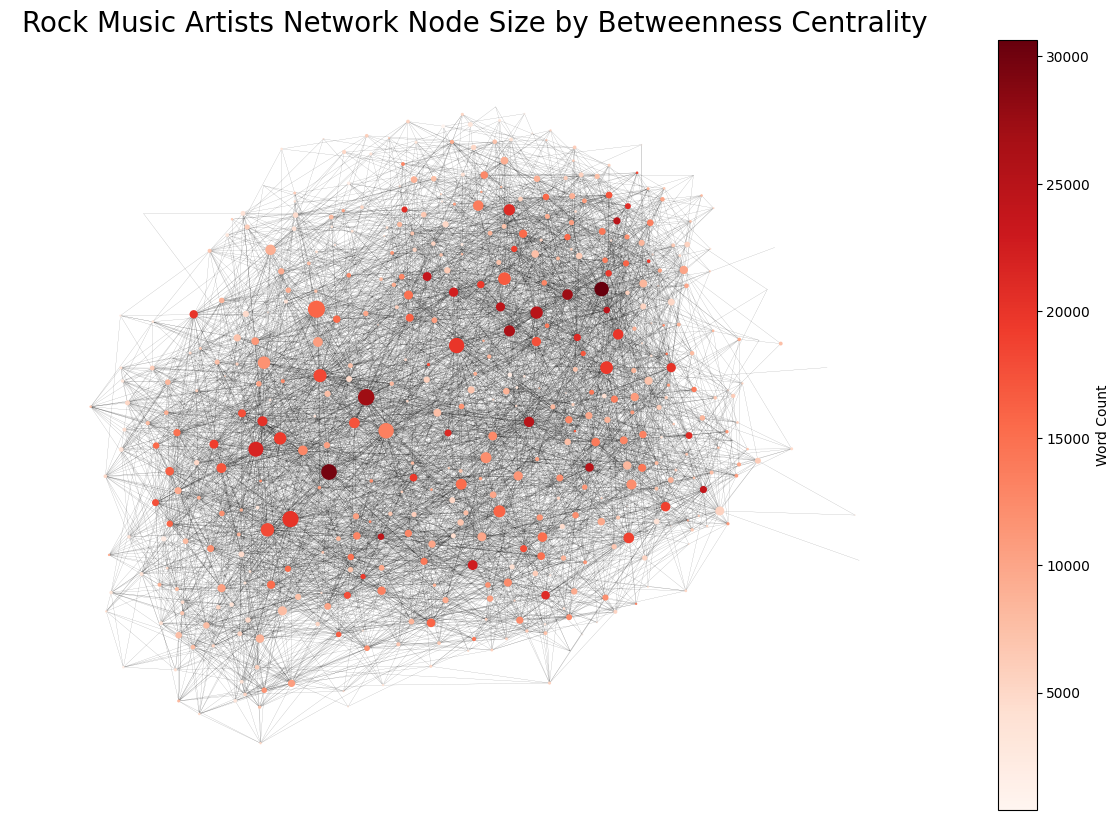

In [12]:
# 5 most central characters betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
top_5_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 most central characters by betweenness centrality:")
for character, centrality in top_5_betweenness:
    print(f"{character}: {centrality:.4f}")

# node size depends on betweenness centrality
node_sizes = [d * 3000 for d in betweenness_centrality.values()]
plt.figure(figsize=(15, 10))
nodes = nx.draw_networkx_nodes(
    G_undirected,
    pos,
    node_size=node_sizes,
    node_color=word_counts,
    cmap=plt.cm.Reds,
)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.6, width=0.1)
plt.title("Rock Music Artists Network Node Size by Betweenness Centrality", fontsize=20)
cbar = plt.colorbar(nodes)
cbar.set_label("Word Count")
plt.axis('off')
plt.show()


Top 5 most central characters by in edge eigenvector centrality:
Led Zeppelin: 0.2238
Black Sabbath: 0.1976
Metallica: 0.1875
Queen (band): 0.1833
Kiss (band): 0.1631


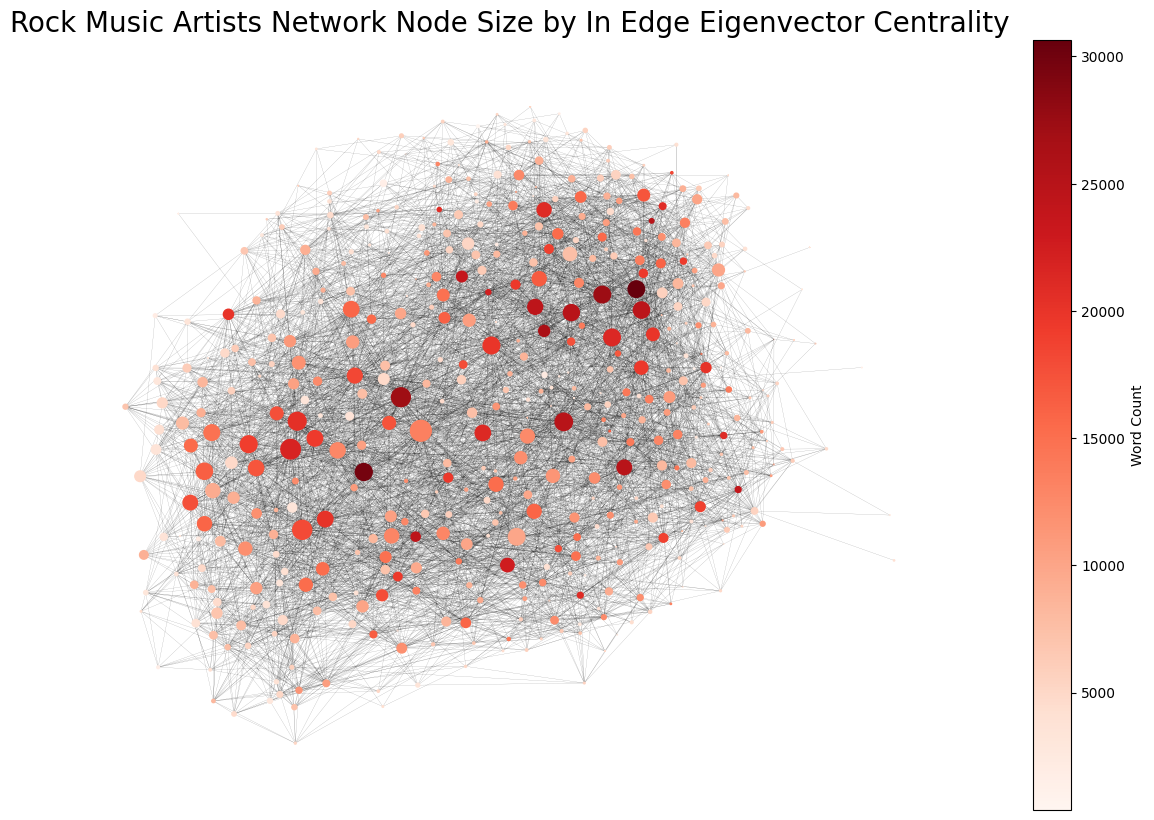


Top 5 most central characters by out-edge eigenvector centrality:
Alice in Chains: 0.2063
Black Sabbath: 0.1750
Deep Purple: 0.1718
Metallica: 0.1632
Megadeth: 0.1611


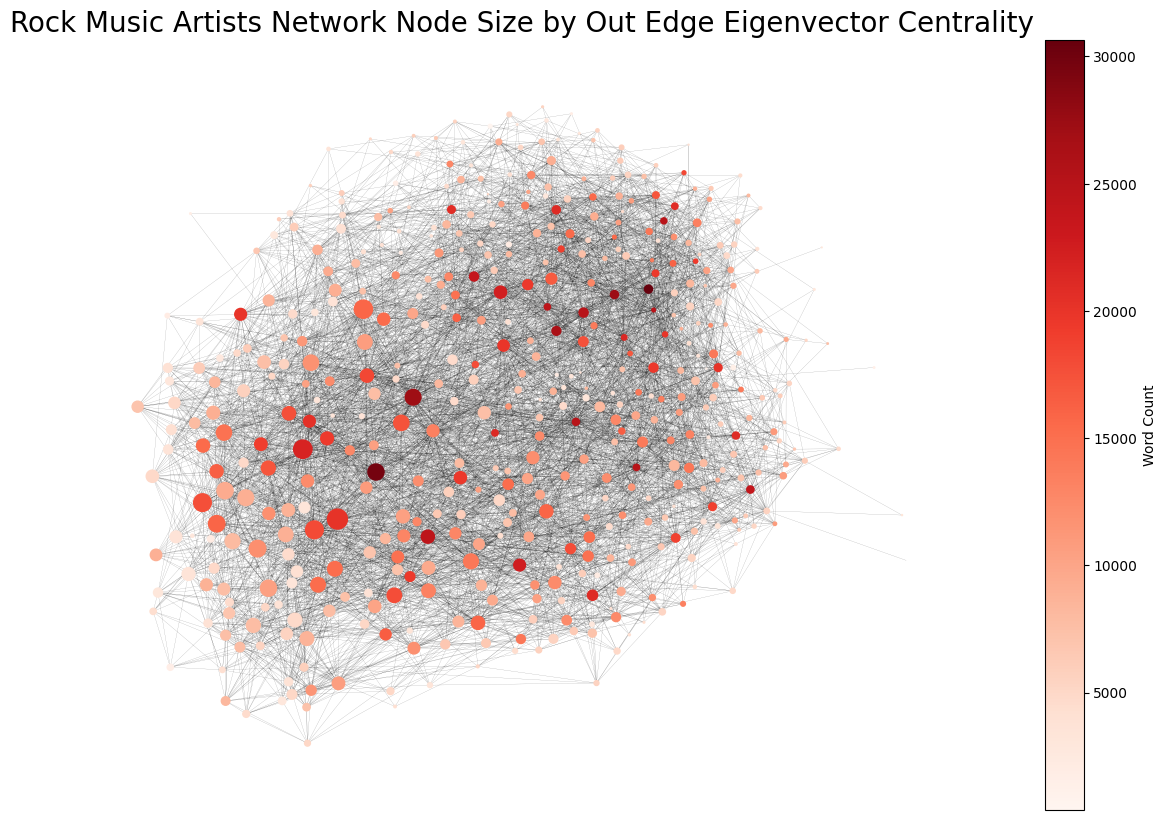

In [13]:
# 5 most central characters eigenvector centrality (in and out degree)
eigenvector_in = nx.eigenvector_centrality(G)
top_5_eigenvector_in = sorted(eigenvector_in.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 most central characters by in edge eigenvector centrality:")
for character, centrality in top_5_eigenvector_in:
    print(f"{character}: {centrality:.4f}")

# node size depends on in edge eigenvector centrality
node_sizes = [d * 1000 for d in eigenvector_in.values()]
plt.figure(figsize=(15, 10))
nodes = nx.draw_networkx_nodes(
    G_undirected,
    pos,
    node_size=node_sizes,
    node_color=word_counts,
    cmap=plt.cm.Reds,
)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.6, width=0.1)
plt.title("Rock Music Artists Network Node Size by In Edge Eigenvector Centrality", fontsize=20)
cbar = plt.colorbar(nodes)
cbar.set_label("Word Count")
plt.axis('off')
plt.show()

# to get out edge eigenvector centrality we reverse the graph
G_reversed = G.reverse(copy=True)
eigenvector_out = nx.eigenvector_centrality(G_reversed)
top_5_eigenvector_out = sorted(eigenvector_out.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 most central characters by out-edge eigenvector centrality:")
for character, centrality in top_5_eigenvector_out:
    print(f"{character}: {centrality:.4f}")

# node size depends on in edge eigenvector centrality
node_sizes = [d * 1000 for d in eigenvector_out.values()]
plt.figure(figsize=(15, 10))
nodes = nx.draw_networkx_nodes(
    G_undirected,
    pos,
    node_size=node_sizes,
    node_color=word_counts,
    cmap=plt.cm.Reds,
)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.6, width=0.1)
plt.title("Rock Music Artists Network Node Size by Out Edge Eigenvector Centrality", fontsize=20)
cbar = plt.colorbar(nodes)
cbar.set_label("Word Count")
plt.axis('off')
plt.show()


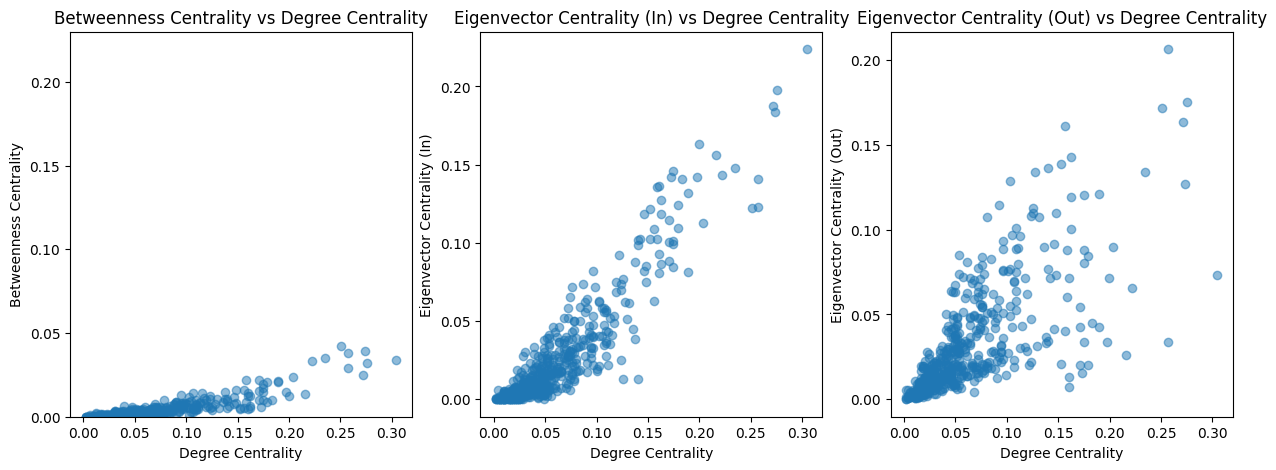

In [14]:
# betweenness centrality vs degree centrality and eigenvector centrality (in & out) vs degree centrality 
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(list(degree_centrality.values()), list(betweenness_centrality.values()), alpha=0.5)
plt.ylim(0, 0.23)
plt.xlabel('Degree Centrality')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality vs Degree Centrality')

plt.subplot(1, 3, 2)
plt.scatter(list(degree_centrality.values()), list(eigenvector_in.values()), alpha=0.5)
plt.xlabel('Degree Centrality')
plt.ylabel('Eigenvector Centrality (In)')
plt.title('Eigenvector Centrality (In) vs Degree Centrality')

plt.subplot(1, 3, 3)
plt.scatter(list(degree_centrality.values()), list(eigenvector_out.values()), alpha=0.5)
plt.xlabel('Degree Centrality')
plt.ylabel('Eigenvector Centrality (Out)')
plt.title('Eigenvector Centrality (Out) vs Degree Centrality')
plt.axes
plt.show()


In [15]:
# degree assortativity for the undirected graph
degree_assortativity = nx.degree_assortativity_coefficient(G_undirected)
print(f"Degree assortativity coefficient: {degree_assortativity:.4f}")

Degree assortativity coefficient: 0.0080


In [16]:
# attribute assortativity for 'word_count'
attribute_assortativity = nx.attribute_assortativity_coefficient(G_undirected, 'word_count')
print(f"Attribute assortativity for 'word_count': {attribute_assortativity:.4f}")

Attribute assortativity for 'word_count': -0.0032


Rock artist Network:
Average Shortest Path Length: 2.3722

Random Network:
Average Shortest Path Length: 2.2149


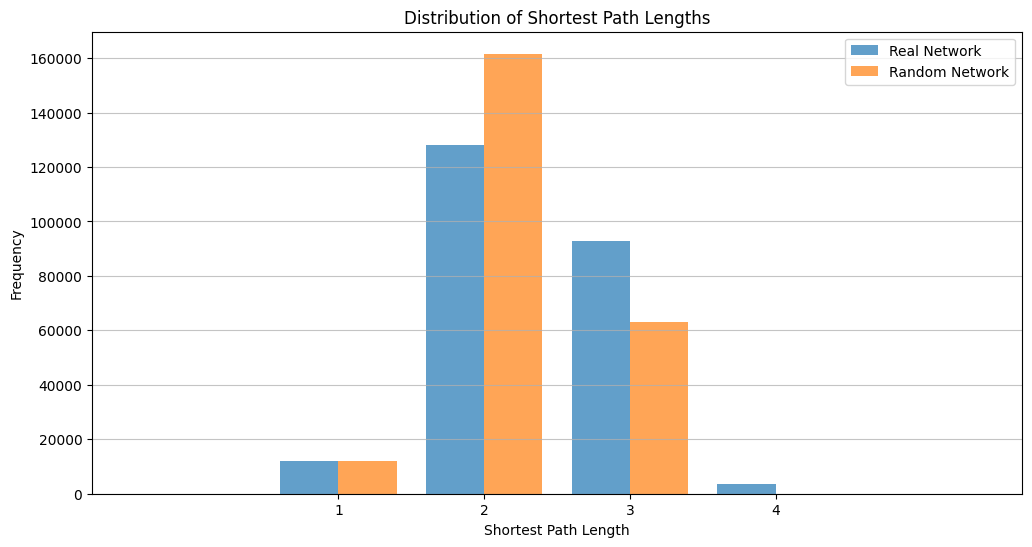

In [17]:
# average shortest path length vs a random graph
N = G_undirected.number_of_nodes()
L = G_undirected.number_of_edges()

avg_shortest_path_real = nx.average_shortest_path_length(G_undirected)
print(f"Rock artist Network:")
print(f"Average Shortest Path Length: {avg_shortest_path_real:.4f}")

# random Erdos-Renyi graph with the same number of nodes and edges
ER = nx.gnm_random_graph(N, L)
if not nx.is_connected(ER):
    largest_cc_random = max(nx.connected_components(ER), key=len)
    ER_conn = ER.subgraph(largest_cc_random).copy()
else:
    ER_conn = ER.copy()

avg_shortest_path_random = nx.average_shortest_path_length(ER_conn)
print(f"\nRandom Network:")
print(f"Average Shortest Path Length: {avg_shortest_path_random:.4f}")

paths_real = [l for l_dict in dict(nx.all_pairs_shortest_path_length(G_undirected)).values() for l in l_dict.values() if l > 0]
paths_random = [l for l_dict in dict(nx.all_pairs_shortest_path_length(ER_conn)).values() for l in l_dict.values() if l > 0]

# plot
max_len = max(max(paths_real), max(paths_random))
bins = np.arange(max_len + 2) - 0.5
hist_real, bin_edges_real = np.histogram(paths_real, bins=bins)
hist_random, bin_edges_random = np.histogram(paths_random, bins=bins)
plt.figure(figsize=(12, 6))
width = 0.4
bin_centers = bin_edges_real[:-1] + 0.5
plt.bar(bin_centers - width/2, hist_real, width=width, alpha=0.7, label='Real Network')
plt.bar(bin_centers + width/2, hist_random, width=width, alpha=0.7, label='Random Network')
plt.title('Distribution of Shortest Path Lengths')
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(np.arange(1, max_len))
plt.grid(axis='y', alpha=0.75)
plt.show()

# Part C: Backbones and Network Visualization 

One method to clean up the "hairball"-looking networks, is known as the [backbone method](https://www.pnas.org/doi/10.1073/pnas.0808904106). Sometimes this method is also called the "disparity filter". I explain what it's all about in the video below.

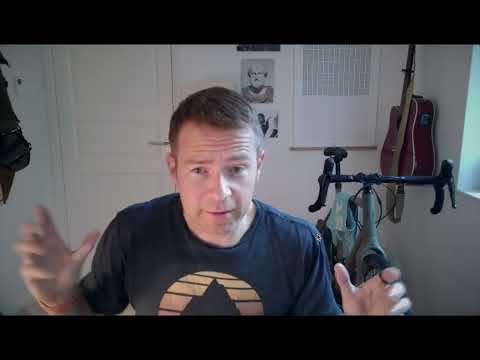

In [18]:
YouTubeVideo("GOvsrVulbsg", width=800, height=450)

There are [many backbone extraction algorithms](https://www.michelecoscia.com/?page_id=287), and I've chosen to talk about the *Disparity Filter* here, because it's the oldest and most commonly used method (so I though you should know about it). Plus, it'll probably be the relevant method for your project.

This choice, however, presents us with a problem: As I explain in the video, the Disparity Filter method *only works on weighted networks*. But our network does not have edge weights in any kind of natural way (since there's usually just a single link between two wiki pages). 


So to get rid of unimportant edges, we'll have to try something different. I present you with three possible methods below. For the first two ones, we'll add weights proportional to the [edge betweenness centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html). The edge betweenness centrality is just like the node betweenness centrality that you know and love ... only that it's defined for *edges* instead of nodes.

We can create two new weighted networks based on the edge betweenness
 * **Weighted Network 1**: The ***undirected*** Rock Music Network (Giant Connected Component) but with edge weights proportional to the edge betweenness centrality (let's renormalize so that the lowest weight is equal to 1 and the highest weight is equal to 100).
 * **Weighted Network 2**: The ***undirected*** Rock Music Network  (Giant Connected Component) but with edge weights proportional to 1/(edge weight in Weighted Network 1).

The third strategy (resulting in **Weighted network 3**) is to use a method designed for extracting structure from undirected networks: The [**High-Salience Skeleton**](https://www.nature.com/articles/ncomms1847). It's implemented as part of [this backbone extraction package](https://www.michelecoscia.com/?page_id=287)


Now we're ready for the exercise.


*Exercise 5*: Visualizing the Network Backbone

> 1. Extract the network backbone for both Weighted Network 1, 2, and 3. You can implement the disparity filter yourself based on the [scientific paper](https://www.pnas.org/doi/10.1073/pnas.0808904106) or find an implentation on GitHub (there are several ones to choose from ... I like [this implementation](https://www.michelecoscia.com/?page_id=287), which also includes other interesting edge filters). Figure out how your particular backbone extractor works (you may have to inspect the code itself, these packages are not always well documented). Play around with values of $\alpha$ to get an aestetically pleasing visualization (but don't make the resulting network too sparse).
> 2. Plot the resulting three networks using ForceAtlas2, still sizing nodes according to total degree. No need to color them. If your backbone has some disconnected nodes, feel free to not plot them. And remember to calculate a new layout to see how the structure has changed.
> 3. Comment on your results
>    * Do you see any structures in the networks now? Inspect some nodes to get a sense of what the structures captures in the three networks. Describe your findings in your own words.
>       * Yes some structures appeared after the different backboning strategies. Backbone 1 for example, which is construced on the high betweennes edges, highlights those particula links that connect two distinct clusters of nodes stripping away most of the others. Backbone 2 is the inverse of the first one, and this is given by the mathmatical formula we used to calculate the weights which is 1/(edge weight in Weighted Network 1). The network representation shows the local connections that have been preserved by the filter, highlighting the artists that are closely related for example. Backbone 3 can be seen as a middle view of backbone 1 and 2. Some long connection between different cluseters have been preserved but also local connections within similar artists are present.
>    * Weighted network 1, 2, and 3 are very different. In 1 and 2, we have removed edges with low/high edge betweenness centrality respectively and HSH is based on shortest paths. What have the various filters done to the networks? Describe what you see visually, and your explain your thoughts on what we've done to the network structures.
>       * For the first fileter we get the most important inter long range connections indicating the nodes that are fundamental to interconnect the whole network and its different hubs. Filter 2 shows the opposite, so the connections in each community and their structure. Filter 3 doesn't relay on precomputed metric like the edge betweenness and it evaluates the network based on the edges that are most important for moving through the graph, basically it's a mix of both filter 1 and filter 2 and shows a balanced picture of the network. 

<div class="alert alert-block alert-info">
There's a lot to do today, so knock youself out with your LLM for this exercise, hopefully it can make your life easier (although I hope you'll do a bit of your own thinking, since a lot of complicated conceptual things are going on with the interplay between the backboning and edge betweenness and inverse edge betweenness!)</div>

One final thing. For now, the backbones are mostly for visualization. Especially because the edge weights are a bit artificial. Generally, it's not exactly clear what kind of information we get rid off when removing the non-backbone edges -- and in our case it's even less clear because I've made up two of the methods. Thus, we'll still do the exercises during the following weeks using the full network that preserves all of the connection information.

Calculating DF score...
Calculating DF score...
Calculating HSS score...


Backbone 1 (Disparity Filter on High Betweenness): 400 nodes, 512 edges
Backbone 2 (Disparity Filter on Low Betweenness): 425 nodes, 659 edges
Backbone 3 (High-Salience Skeleton): 266 nodes, 512 edges


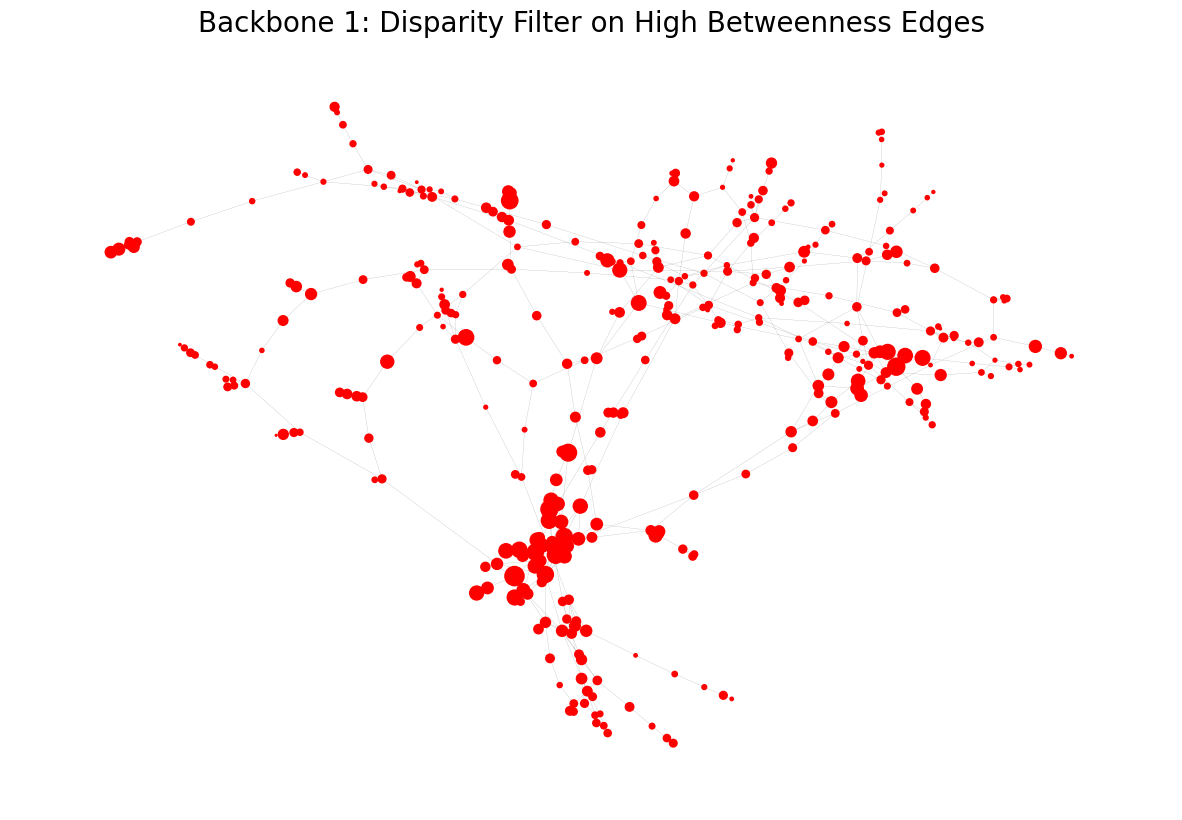

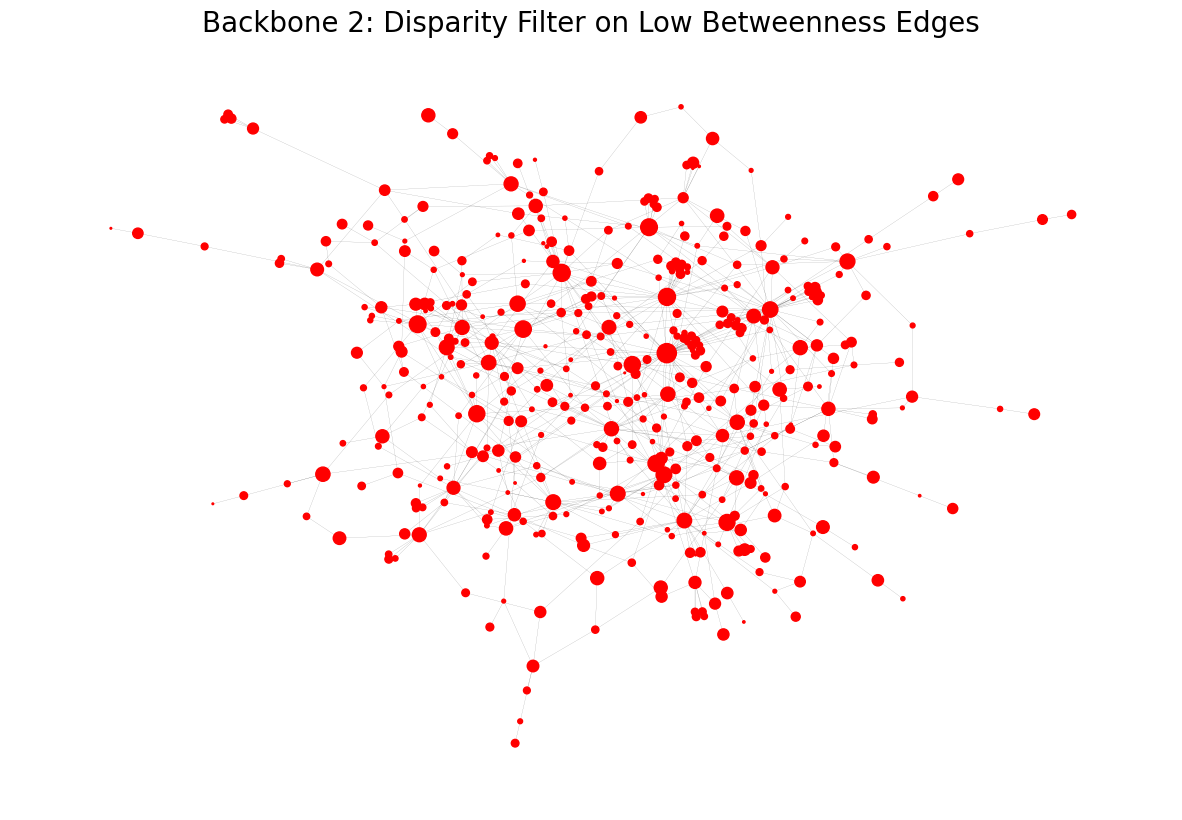

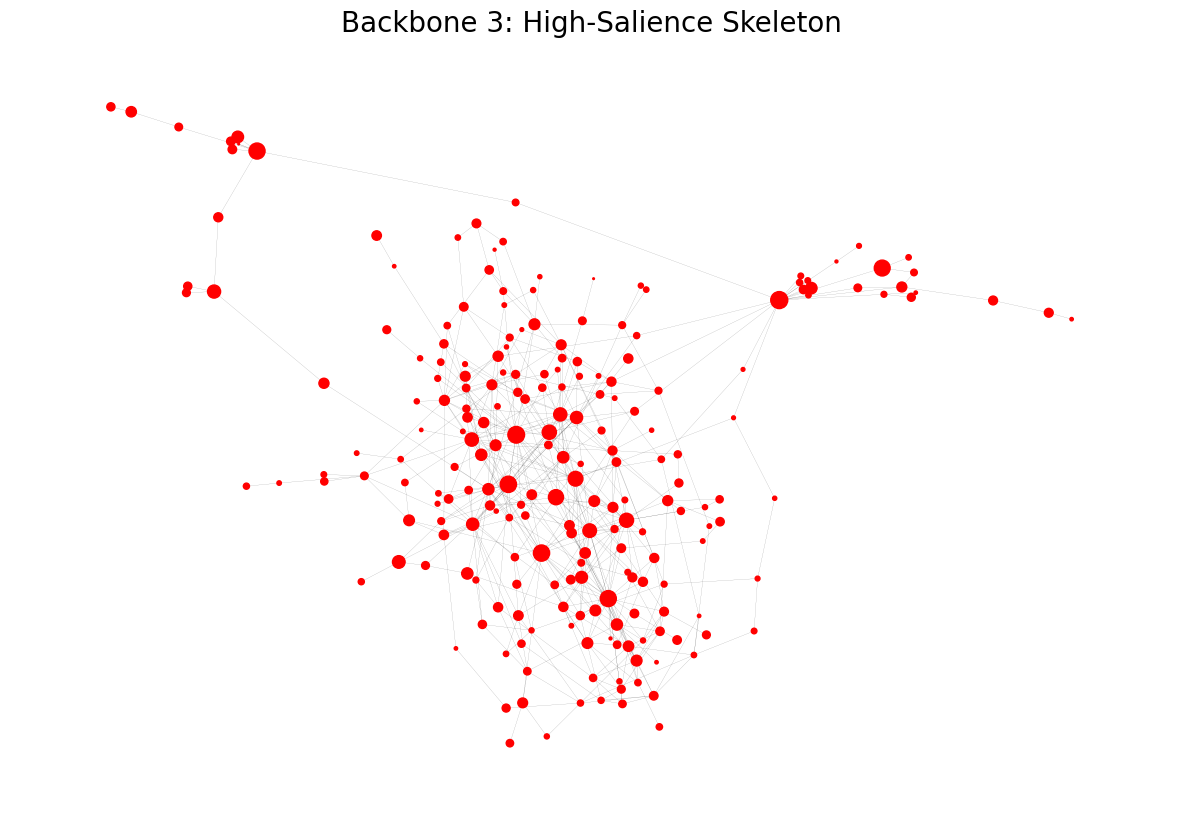

In [26]:
edge_betweenness = nx.edge_betweenness_centrality(G_undirected)

# weighted network 1
G_w1 = G_undirected.copy()

# scale in range [1, 100]
eb_values = list(edge_betweenness.values())
min_val = min(eb_values)
max_val = max(eb_values)
val_range = max_val - min_val
new_min = 1
new_max = 100
new_range = new_max - new_min
scaled_weights = [((x - min_val) / val_range) * new_range + new_min for x in eb_values]

for i, edge in enumerate(edge_betweenness.keys()):
    G_w1.edges[edge]['weight'] = scaled_weights[i]

# weighted network 2
G_w2 = G_undirected.copy()
for i, edge in enumerate(edge_betweenness.keys()):
    G_w2.edges[edge]['weight'] = 1 / scaled_weights[i]

# extract backbones 
# library expects columns 'src', 'trg', and 'nij' (weight)
table_w1 = nx.to_pandas_edgelist(G_w1, source='src', target='trg')
table_w1.rename(columns={'weight': 'nij'}, inplace=True)

table_w2 = nx.to_pandas_edgelist(G_w2, source='src', target='trg')
table_w2.rename(columns={'weight': 'nij'}, inplace=True)

# weighted network 3
G_undirected_w = G_undirected.copy()
nx.set_edge_attributes(G_undirected_w, 1, 'weight')
table_undirected = nx.to_pandas_edgelist(G_undirected_w, source='src', target='trg')
table_undirected.rename(columns={'weight': 'nij'}, inplace=True)

# the alpha parameter for the first two backbones 
alpha = 0.4

# backbone network 1 
df_backbone1 = bb.disparity_filter(table_w1, undirected=True)
backbone_1_table = df_backbone1[df_backbone1['score'] < alpha]
backbone_1 = nx.from_pandas_edgelist(backbone_1_table, 'src', 'trg', create_using=nx.Graph())
print(f"Backbone 1 (Disparity Filter on High Betweenness): {backbone_1.number_of_nodes()} nodes, {backbone_1.number_of_edges()} edges")

# backbone network 2
df_backbone2 = bb.disparity_filter(table_w2, undirected=True)
backbone_2_table = df_backbone2[df_backbone2['score'] < alpha]
backbone_2 = nx.from_pandas_edgelist(backbone_2_table, 'src', 'trg', create_using=nx.Graph())
print(f"Backbone 2 (Disparity Filter on Low Betweenness): {backbone_2.number_of_nodes()} nodes, {backbone_2.number_of_edges()} edges")

# backbone network 3
# identifies the most 'salient' paths in the network
df_backbone3 = bb.high_salience_skeleton(table_undirected, undirected=True)
top_n_edges = backbone_1.number_of_edges()
backbone_3_table = df_backbone3.nlargest(top_n_edges, 'score')
backbone_3 = nx.from_pandas_edgelist(backbone_3_table, 'src', 'trg', create_using=nx.Graph())
print(f"Backbone 3 (High-Salience Skeleton): {backbone_3.number_of_nodes()} nodes, {backbone_3.number_of_edges()} edges")


# plot the backbones
original_degrees = dict(G_undirected.degree())

def plot_backbone(graph, title, original_degrees_dict):    
    if not nx.is_connected(graph):
        largest_cc = max(nx.connected_components(graph), key=len)
        plot_graph = graph.subgraph(largest_cc)
    else:
        plot_graph = graph

    # Manually call the core forceatlas2 function to avoid the deprecated wrapper
    pos_array = forceatlas2.forceatlas2(nx.to_numpy_array(plot_graph), gravity=0.1)
    pos_backbone = {node: pos_array[i] for i, node in enumerate(plot_graph.nodes())}
    node_sizes = [original_degrees_dict[node] * 1.5 for node in plot_graph.nodes()]

    plt.figure(figsize=(15, 10))
    nx.draw_networkx_nodes(
        plot_graph,
        pos_backbone,
        node_size=node_sizes,
        node_color='red'
    )
    nx.draw_networkx_edges(plot_graph, pos_backbone, alpha=0.6, width=0.1)
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

plot_backbone(backbone_1, "Backbone 1: Disparity Filter on High Betweenness Edges", original_degrees)
plot_backbone(backbone_2, "Backbone 2: Disparity Filter on Low Betweenness Edges", original_degrees)
plot_backbone(backbone_3, "Backbone 3: High-Salience Skeleton", original_degrees)